<a href="https://colab.research.google.com/github/sergiobm3/ESI_MachineLearning/blob/Supervised/Dengue_DecisionTree_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  The Problem


We will use the data from the competition to predict the evolution of Dengue Disease in both Iquitos and San Juan. More information in [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

The objective of the exercise is to solve a regression problem and on the other hand to participate in a data competition.


# Setting Preliminares

Before starting any analysis we must ensure that the basic and general use libraries (numpy, pandas, etc.) are correctly imported. 

In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split

#Algoritmo regresion
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

#Auxiliar
import numpy as np

# Data Loading

First we load the data into the environment with the functionalities provided by Google Colab

# Preprocessing

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, ...

In [2]:
# make function to preprocess data
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path)
    
    # fill missing values
    # try instead using mean and median
    df.fillna(df.mean(), inplace=True)

    #df = df[np.notnull(df)]
    #df = df.dropna()
    lb = LabelBinarizer()
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path)
        
        labels['city'] = lb.fit_transform(labels['city'])
        #df = df.join(labels)
    
    df['city'] =  lb.fit_transform(df['city'])

    selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']
    df = df[selected_features]

#sj_labels.head()
    if labels_path:
        return df, labels
    return df

In [3]:
#load train data
df_features, df_labels  = preprocess_data('dengue_features_train.csv', labels_path="dengue_labels_train.csv")
#load final test data
df_test_final = preprocess_data("dengue_features_test.csv")

We will see the correlation matrix

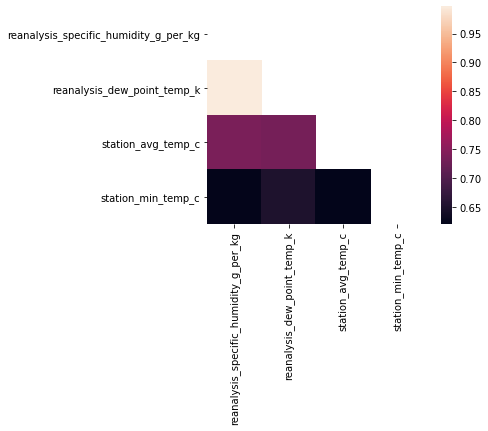

In [4]:
mask = np.zeros_like(df_features.corr())
mask[np.triu_indices_from(mask)] = True

#sns.set()
sns.heatmap(df_features.corr(),xticklabels=df_features.corr().columns,yticklabels=df_features.corr().columns, mask= mask,square=True, annot=False)

You have to select features, they can be all, but that is usually not a good idea, so here we will leave some selected.

In [5]:
#scaler = StandardScaler()  #@param ["MinMaxScaler()", "StandardScaler()"] {type:"raw"}
#df_datanorm = scaler.fit_transform(df_features)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels['total_cases'], test_size=0.3, random_state=1)

Now we are going to train the model with the training data

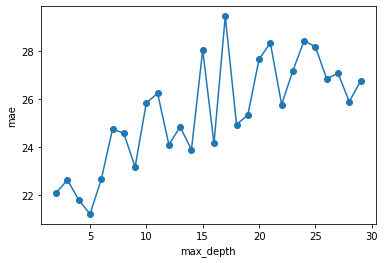

In [7]:
# Compute the max 
mae = []
for i in range(2, 30):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train,y_train)
    pred_values = regressor.predict(X_test)
    maev = mean_absolute_error(y_test,pred_values)
    mae.append(maev)
    
# Plot mae   
plt.plot(range(2,30), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

In [8]:
def TreeRegressor():
    '''
    this function builds a decision tree regressor model
    '''        
    regressor = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=0)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print ('MAE', mae)

    xx = np.stack(i for i in range(y_test.shape[0]))
    plt.plot(xx, y_test, c='r', label='data')
    #plt.plot(xx, y, c='k', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("DecisionTree")

    plt.show()
    return regressor

Finally we try to visualize how our prediction has turned out with reality. We carry out the prediction on the test.

MAE 21.059246027431247


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


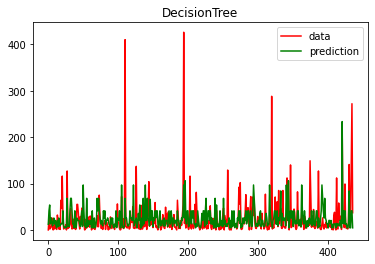

In [9]:
model = TreeRegressor()

# Submission result

We generate the output file according to the Submission format

2. We round up the result. **We use dataset TEST!**

In [11]:
final_prediction = model.predict(df_test_final)

In [12]:
# round the result and cast to int
y = np.rint(final_prediction) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res

array([ 13,   8,  26,  97,  26,  97,   5,  41,  41,  41,  97,  41,  41,
        41,  41,  41,  41,  41,  54,  41,  41,  26,  26,  41,  26,  36,
        97, 106,  36,   5,  26,  20,  14,  13,  20,  12,  20,  14,  20,
        13,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  14,  14,
        14,  14,  66,  26, 106,  26,  97,  41,  97,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  97,  26,  41,  14,   5,   5,  68,  26,  12,  13,  20,   7,
        26,  20,  13,  13,   8,  26,  20,  13,  26,  26,  14,  13,  26,
        41,  26,   5,  41,  41,  54,  41,  41,  14,  14,  54,  54,  41,
        26,  41, 234,  41, 234,  54,  54, 234,  41,  41,  41, 234,  41,
        97,  26,  14,  26,  14,  20,  20,  26,  20,  14,  20,  20,  20,
        20,  20,  20,  14,  20,  20,  20,  20,  20,  20,  13,  20,  14,
        14,  26,  14,  13,   7,  14,  13,  26,  26,  26,  41,  41,  26,
        41,  41,  26,  41,  54,  26,  41,  41,  26,  41,  41,  4

3. We build the output file


In [14]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = final_prediction.astype(np.int64)
submission.to_csv("result.csv")

Upload new submission
Woohoo! We processed your submission!
Your score for this submission is:

28.9639
Woo! I scored 28.9639 on 'DengAI: Predicting Disease Spread'!